## Dataset Info
There are 14 columns in the dataset, where the patient_id column is a unique and random identifier. The remaining 13 features are described in the section below. 

#### 

slope_of_peak_exercise_st_segment (type: int): the slope of the peak exercise ST segment, an electrocardiography read out indicating quality of blood flow to the heart   

thal (type: categorical): results of thallium stress test measuring blood flow to the heart, with possible values normal, fixed_defect, reversible_defect   

resting_blood_pressure (type: int): resting blood pressure  

chest_pain_type (type: int): chest pain type (4 values)  

num_major_vessels (type: int): number of major vessels (0-3) colored by flourosopy  

fasting_blood_sugar_gt_120_mg_per_dl (type: binary): fasting blood sugar > 120 mg/dl  

resting_ekg_results (type: int): resting electrocardiographic results (values 0,1,2)  

serum_cholesterol_mg_per_dl (type: int): serum cholestoral in mg/dl  

oldpeak_eq_st_depression (type: float): oldpeak = ST depression induced by exercise relative to rest, a measure of abnormality in electrocardiograms  

sex (type: binary): 0: female, 1: male  

age (type: int): age in years  

max_heart_rate_achieved (type: int): maximum heart rate achieved (beats per minute)  

exercise_induced_angina (type: binary): exercise-induced chest pain (0: False, 1: True)

####  

### EVALUATION METRIC  
The metric used for this competition is logarithmic loss. Logarithmic loss evaluates probability predictions and provides a steep penalty for predictions that are both confident and wrong. Our goal is to minimize the log loss.
###   

In [1]:
# import
# algebra tools
import math
import numpy as np
import itertools

# preprocessing tools
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import log_loss

# visualization tools
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Scikit-learn
from sklearn.metrics import log_loss
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neural_network import MLPClassifier

In [2]:
# upload train and test files
test_values = pd.read_csv("test_values.csv")
train_values = pd.read_csv("train_values.csv")
train_labels = pd.read_csv("train_labels.csv")

In [3]:
train_values.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0


In [4]:
train_labels.head()

,patient_id,heart_disease_present
0,0z64un,0
1,ryoo3j,0
2,yt1s1x,1
3,l2xjde,1
4,oyt4ek,0


In [5]:
train_labels['heart_disease_present'].value_counts()

0    100
1     80
Name: heart_disease_present, dtype: int64

In [6]:
train_values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 14 columns):
patient_id                              180 non-null object
slope_of_peak_exercise_st_segment       180 non-null int64
thal                                    180 non-null object
resting_blood_pressure                  180 non-null int64
chest_pain_type                         180 non-null int64
num_major_vessels                       180 non-null int64
fasting_blood_sugar_gt_120_mg_per_dl    180 non-null int64
resting_ekg_results                     180 non-null int64
serum_cholesterol_mg_per_dl             180 non-null int64
oldpeak_eq_st_depression                180 non-null float64
sex                                     180 non-null int64
age                                     180 non-null int64
max_heart_rate_achieved                 180 non-null int64
exercise_induced_angina                 180 non-null int64
dtypes: float64(1), int64(11), object(2)
memory usage: 19.8+ KB


In [7]:
test_values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 14 columns):
patient_id                              90 non-null object
slope_of_peak_exercise_st_segment       90 non-null int64
thal                                    90 non-null object
resting_blood_pressure                  90 non-null int64
chest_pain_type                         90 non-null int64
num_major_vessels                       90 non-null int64
fasting_blood_sugar_gt_120_mg_per_dl    90 non-null int64
resting_ekg_results                     90 non-null int64
serum_cholesterol_mg_per_dl             90 non-null int64
oldpeak_eq_st_depression                90 non-null float64
sex                                     90 non-null int64
age                                     90 non-null int64
max_heart_rate_achieved                 90 non-null int64
exercise_induced_angina                 90 non-null int64
dtypes: float64(1), int64(11), object(2)
memory usage: 10.0+ KB


### No missing data.

#   
# Feature Engineering:
#  

In [8]:
#lets create some features that might be interesting

for variable in [test_values, train_values]:
    
    variable['heart_rate/blood_pressure']= (variable['max_heart_rate_achieved']/variable['resting_blood_pressure']).round(2)
    variable['cholesterol/blood_pressure']= (variable['serum_cholesterol_mg_per_dl']/variable['resting_blood_pressure']).round(2)
    variable['blood_pressure/age']= (variable['resting_blood_pressure']/variable['age']).round(2)
    variable['cholesterol/age']= (variable['serum_cholesterol_mg_per_dl']/variable['age']).round(2)
    variable['heart_rate/age']= (variable['max_heart_rate_achieved']/variable['age']).round(2)
   
    variable['heart_rate*blood_pressure']= (variable['max_heart_rate_achieved']*variable['resting_blood_pressure']).round(2)
    variable['cholesterol*blood_pressure']= (variable['serum_cholesterol_mg_per_dl']*variable['resting_blood_pressure']).round(2)
    variable['blood_pressure*age']= (variable['resting_blood_pressure']*variable['age']).round(2)
    variable['cholesterol*age']= (variable['serum_cholesterol_mg_per_dl']*variable['age']).round(2)
    variable['heart_rate*age']= (variable['max_heart_rate_achieved']*variable['age']).round(2)
    
#     these enginered features negatively impacted my models accuracy
#     variable['log10(heart_rate)']= np.log10(variable['max_heart_rate_achieved']).round(2)
#     variable['log10(cholesterol)']= np.log10(variable['serum_cholesterol_mg_per_dl']).round(2)
#     variable['log10(blood_pressure)']= np.log10(variable['resting_blood_pressure']).round(2)
#     variable['log10(age)']= np.log10(variable['age']).round(2)

#     variable['heart_rate*heart_rate']= (variable['max_heart_rate_achieved']*variable['max_heart_rate_achieved']).round(2)
#     variable['cholesterol*cholesterol']= (variable['serum_cholesterol_mg_per_dl']*variable['serum_cholesterol_mg_per_dl']).round(2)
#     variable['blood_pressure*blood_pressure']= (variable['resting_blood_pressure']*variable['resting_blood_pressure']).round(2)
#     variable['age*age']= (variable['age']*variable['age']).round(2)

In [9]:
train_values['thal'].value_counts()

normal               98
reversible_defect    74
fixed_defect          8
Name: thal, dtype: int64

In [10]:
train_values['chest_pain_type'].value_counts()

4    82
3    57
2    28
1    13
Name: chest_pain_type, dtype: int64

In [11]:
train_values['resting_ekg_results'].value_counts()

2    94
0    85
1     1
Name: resting_ekg_results, dtype: int64

In [12]:
train_values= pd.get_dummies(train_values, columns= ['thal','chest_pain_type','resting_ekg_results'], drop_first=False)
test_values= pd.get_dummies(test_values, columns= ['thal','chest_pain_type','resting_ekg_results'], drop_first=False)

test_values = test_values.reindex(columns = train_values.columns, fill_value=0)

In [13]:
train_values.head()

,patient_id,slope_of_peak_exercise_st_segment,resting_blood_pressure,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,...,thal_fixed_defect,thal_normal,thal_reversible_defect,chest_pain_type_1,chest_pain_type_2,chest_pain_type_3,chest_pain_type_4,resting_ekg_results_0,resting_ekg_results_1,resting_ekg_results_2
0,0z64un,1,128,0,0,308,0.0,1,45,170,...,0,1,0,0,1,0,0,0,0,1
1,ryoo3j,2,110,0,0,214,1.6,0,54,158,...,0,1,0,0,0,1,0,1,0,0
2,yt1s1x,1,125,3,0,304,0.0,1,77,162,...,0,1,0,0,0,0,1,0,0,1
3,l2xjde,1,152,0,0,223,0.0,1,40,181,...,0,0,1,0,0,0,1,1,0,0
4,oyt4ek,3,178,0,0,270,4.2,1,59,145,...,0,0,1,1,0,0,0,0,0,1


In [14]:
#standardize features by removing the mean and scaling to unit variance
ss = StandardScaler()
features= train_values.columns.drop('patient_id').tolist()
ss.fit(train_values[features].values)

standardized_train_values = train_values.copy()
standardized_test_values = test_values.copy()

standardized_train_values[features] = ss.transform(train_values[features])
standardized_test_values[features] = ss.transform(test_values[features])

In [15]:
standardized_train_values.head()

,patient_id,slope_of_peak_exercise_st_segment,resting_blood_pressure,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,...,thal_fixed_defect,thal_normal,thal_reversible_defect,chest_pain_type_1,chest_pain_type_2,chest_pain_type_3,chest_pain_type_4,resting_ekg_results_0,resting_ekg_results_1,resting_ekg_results_2
0,0z64un,-0.891241,-0.195195,-0.718403,-0.438238,1.118269,-0.903207,0.672022,-1.053964,0.932485,...,-0.215666,0.914732,-0.835532,-0.279006,2.329929,-0.680746,-0.914732,-0.945905,-0.074744,0.956501
1,ryoo3j,0.729197,-1.256320,-0.718403,-0.438238,-0.669778,0.527616,-1.488048,-0.087134,0.387084,...,-0.215666,0.914732,-0.835532,-0.279006,-0.429198,1.468977,-0.914732,1.057188,-0.074744,-1.045478
2,yt1s1x,-0.891241,-0.372049,2.385097,-0.438238,1.042182,-0.903207,0.672022,2.383654,0.568884,...,-0.215666,0.914732,-0.835532,-0.279006,-0.429198,-0.680746,1.093216,-0.945905,-0.074744,0.956501
3,l2xjde,-0.891241,1.219639,-0.718403,-0.438238,-0.498582,-0.903207,0.672022,-1.591092,1.432436,...,-0.215666,-1.093216,1.196843,-0.279006,-0.429198,-0.680746,1.093216,1.057188,-0.074744,-1.045478
4,oyt4ek,2.349636,2.752375,-0.718403,-0.438238,0.395442,2.852703,0.672022,0.449994,-0.203768,...,-0.215666,-1.093216,1.196843,3.584153,-0.429198,-0.680746,-0.914732,-0.945905,-0.074744,0.956501


#   

In [16]:
visual_df = standardized_train_values.copy()
visual_df['heart_disease_present'] = train_labels['heart_disease_present']

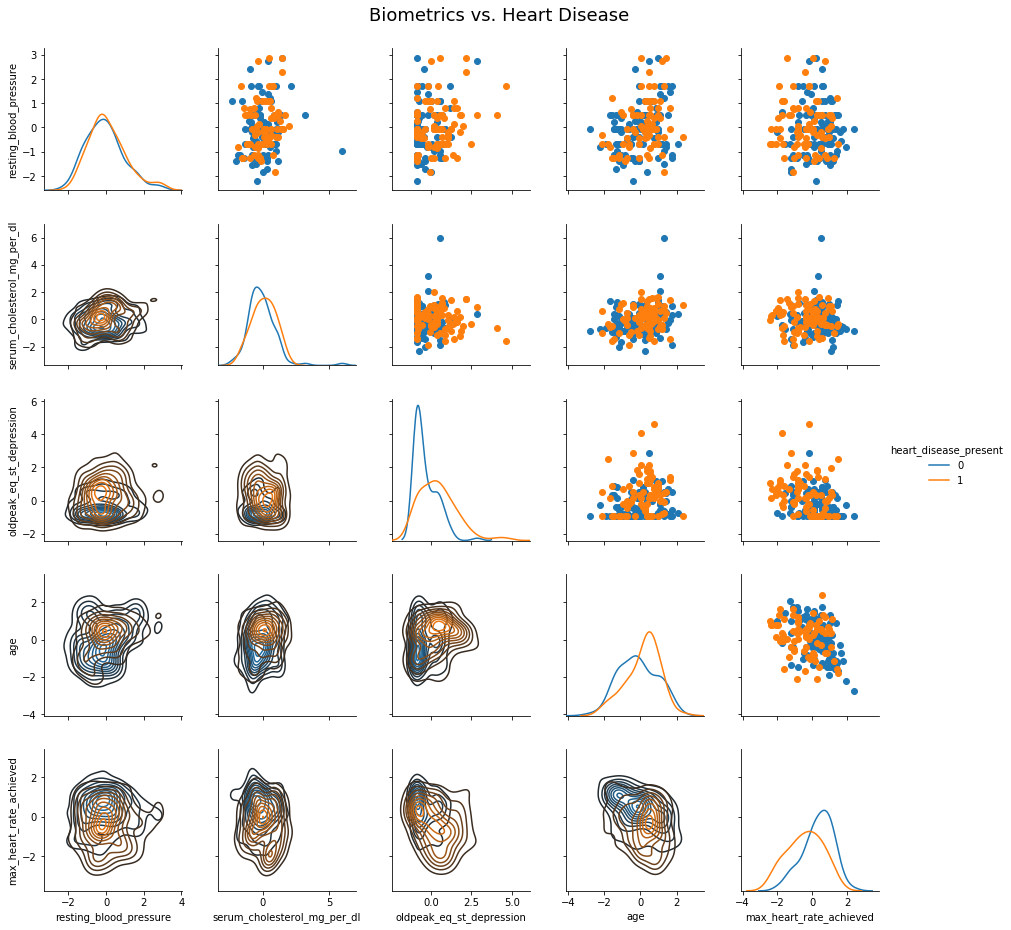

In [17]:
pairgrid1= sns.PairGrid(visual_df,
                        vars=['resting_blood_pressure','serum_cholesterol_mg_per_dl','oldpeak_eq_st_depression','age','max_heart_rate_achieved'],
                        hue='heart_disease_present',
                       )

pairgrid1.map_upper(plt.scatter)
pairgrid1.map_diag(sns.kdeplot) #distripution plots
pairgrid1.map_lower(sns.kdeplot) #contour plots


pairgrid1.add_legend()
pairgrid1.fig.suptitle('Biometrics vs. Heart Disease', fontsize=18, y = 1.03)
plt.show()

In [1]:
pairgrid2= sns.PairGrid(visual_df,
                        vars=['heart_rate/blood_pressure','cholesterol/blood_pressure' ,'blood_pressure/age', 'cholesterol/age','heart_rate/age'], 
                        hue='heart_disease_present',
                        )
pairgrid2.map_upper(plt.scatter)
pairgrid2.map_diag(sns.kdeplot) #distripution plots
pairgrid2.map_lower(sns.kdeplot) #contour plots


pairgrid2.fig.suptitle('Biometrics(2) vs. Heart Disease', fontsize=18, y = 1.03)
pairgrid2.add_legend()
plt.show()

NameError: name 'sns' is not defined

### we are able to see some cluster seberation between heart disease patients vs healthy individuals, which is a promising prospect for our models

##  
# Fit Models (default parameters):
##  

In [19]:
#define some shorthands for our models' inputs'
x_train = standardized_train_values.drop("patient_id", axis=1)
y_train = train_labels['heart_disease_present']
x_test  = standardized_test_values.drop("patient_id", axis=1)

###   
###   

In [20]:
lr = LogisticRegression(solver='lbfgs')

lr_score = cross_val_score(lr, x_train, y_train, cv=5, scoring='accuracy')

lr_log_loss = abs(cross_val_score(lr, x_train, y_train, cv=5, scoring='neg_log_loss'))

print(f'Mean cross-validated accuracy score= {(lr_score.mean()*100).round(2)} +/- {(lr_score.std()*100).round(2)}')
print(f'Mean cross-validated log loss= {(lr_log_loss.mean()).round(5)} +/- {(lr_log_loss.std()).round(5)}')

Mean cross-validated accuracy score= 82.78 +/- 7.54
Mean cross-validated log loss= 0.43763 +/- 0.15102


In [21]:
rfc = RandomForestClassifier(n_estimators=10000, random_state=23)

rfc_score = cross_val_score(rfc, x_train, y_train, cv=5, scoring='accuracy')

rfc_log_loss = abs(cross_val_score(rfc, x_train, y_train, cv=5, scoring='neg_log_loss'))

print(f'Mean cross-validated accuracy score= {(rfc_score.mean()*100).round(2)} +/- {(rfc_score.std()*100).round(2)}')
print(f'Mean cross-validated log loss= {(rfc_log_loss.mean()).round(5)} +/- {(rfc_log_loss.std()).round(5)}')

Mean cross-validated accuracy score= 78.33 +/- 5.39
Mean cross-validated log loss= 0.46635 +/- 0.08191


In [22]:
knn = KNeighborsClassifier()

knn_score = cross_val_score(knn, x_train, y_train, cv=5, scoring='accuracy')

knn_log_loss = abs(cross_val_score(knn, x_train, y_train, cv=5, scoring='neg_log_loss'))

print(f'Mean cross-validated accuracy score= {(knn_score.mean()*100).round(2)} +/- {(knn_score.std()*100).round(2)}')
print(f'Mean cross-validated log loss= {(knn_log_loss.mean()).round(5)} +/- {(knn_log_loss.std()).round(5)}')

Mean cross-validated accuracy score= 76.67 +/- 7.78
Mean cross-validated log loss= 1.71364 +/- 1.66592


In [23]:
sgdc = SGDClassifier(tol= 1e-3, loss='log', random_state=23)

sgdc_score = cross_val_score(sgdc, x_train, y_train, cv=5, scoring='accuracy')

sgdc_log_loss = abs(cross_val_score(sgdc, x_train, y_train, cv=5, scoring='neg_log_loss'))

print(f'Mean cross-validated accuracy score= {(sgdc_score.mean()*100).round(2)} +/- {(sgdc_score.std()*100).round(2)}')
print(f'Mean cross-validated log loss= {(sgdc_log_loss.mean()).round(5)} +/- {(sgdc_log_loss.std()).round(5)}')

Mean cross-validated accuracy score= 78.89 +/- 4.84
Mean cross-validated log loss= 4.00128 +/- 1.86773


In [24]:
lsvc = SVC(max_iter=100000, gamma='scale', kernel= 'linear', probability=True, tol= 1e-3)

lsvc_score = cross_val_score(lsvc, x_train, y_train, cv=5, scoring='accuracy')

lsvc_log_loss = abs(cross_val_score(lsvc, x_train, y_train, cv=5, scoring='neg_log_loss'))

print(f'Mean cross-validated accuracy score= {(lsvc_score.mean()*100).round(2)} +/- {(lsvc_score.std()*100).round(2)}')
print(f'Mean cross-validated log loss= {(lsvc_log_loss.mean()).round(5)} +/- {(lsvc_log_loss.std()).round(5)}')

Mean cross-validated accuracy score= 81.11 +/- 6.89
Mean cross-validated log loss= 0.44772 +/- 0.09689


In [25]:
svc = SVC(gamma='scale', probability=True, tol= 1e-3)

svc_score = cross_val_score(svc, x_train, y_train, cv=5, scoring='accuracy')

svc_log_loss = abs(cross_val_score(svc, x_train, y_train, cv=5, scoring='neg_log_loss'))

print(f'Mean cross-validated accuracy score= {(svc_score.mean()*100).round(2)} +/- {(svc_score.std()*100).round(2)}')
print(f'Mean cross-validated log loss= {(svc_log_loss.mean()).round(5)} +/- {(svc_log_loss.std()).round(5)}')

Mean cross-validated accuracy score= 76.11 +/- 10.77
Mean cross-validated log loss= 0.4737 +/- 0.13648


In [26]:
gnb = GaussianNB()

gnb_score = cross_val_score(gnb, x_train, y_train, cv=5, scoring='accuracy')

gnb_log_loss = abs(cross_val_score(gnb, x_train, y_train, cv=5, scoring='neg_log_loss'))

print(f'Mean cross-validated accuracy score= {(gnb_score.mean()*100).round(2)} +/- {(gnb_score.std()*100).round(2)}')
print(f'Mean cross-validated log loss= {(gnb_log_loss.mean()).round(5)} +/- {(gnb_log_loss.std()).round(5)}')

Mean cross-validated accuracy score= 71.67 +/- 5.93
Mean cross-validated log loss= 2.52587 +/- 0.7748


In [27]:
gpc = GaussianProcessClassifier(n_restarts_optimizer= 1000, max_iter_predict= 100000, random_state=23,multi_class='one_vs_one',  n_jobs=-1, warm_start=True)

gpc_score = cross_val_score(gpc, x_train, y_train, cv=5, scoring='accuracy')

gpc_log_loss = abs(cross_val_score(gpc, x_train, y_train, cv=5, scoring='neg_log_loss'))

print(f'Mean cross-validated accuracy score= {(gpc_score.mean()*100).round(2)} +/- {(gpc_score.std()*100).round(2)}')
print(f'Mean cross-validated log loss= {(gpc_log_loss.mean()).round(5)} +/- {(gpc_log_loss.std()).round(5)}')

Mean cross-validated accuracy score= 72.22 +/- 8.61
Mean cross-validated log loss= 0.6909 +/- 0.00194


In [28]:
adaboost = AdaBoostClassifier(n_estimators=10000)

adaboost_score = cross_val_score(adaboost, x_train, y_train, cv=5, scoring='accuracy')

adaboost_log_loss = abs(cross_val_score(adaboost, x_train, y_train, cv=5, scoring='neg_log_loss'))

print(f'Mean cross-validated accuracy score= {(adaboost_score.mean()*100).round(2)} +/- {(adaboost_score.std()*100).round(2)}')
print(f'Mean cross-validated log loss= {(adaboost_log_loss.mean()).round(5)} +/- {(adaboost_log_loss.std()).round(5)}')

Mean cross-validated accuracy score= 78.89 +/- 5.15
Mean cross-validated log loss= 0.67178 +/- 0.00228


In [29]:
gradientboost = GradientBoostingClassifier(n_estimators=10000)

gradientboost_score = cross_val_score(gradientboost, x_train, y_train, cv=5, scoring='accuracy')

gradientboost_log_loss = abs(cross_val_score(gradientboost, x_train, y_train, cv=5, scoring='neg_log_loss'))

print(f'Mean cross-validated accuracy score= {(gradientboost_score.mean()*100).round(2)} +/- {(gradientboost_score.std()*100).round(2)}')
print(f'Mean cross-validated log loss= {(gradientboost_log_loss.mean()).round(5)} +/- {(gradientboost_log_loss.std()).round(5)}')

Mean cross-validated accuracy score= 77.22 +/- 7.54
Mean cross-validated log loss= 0.86884 +/- 0.42216


In [30]:
perceptron = Perceptron(max_iter=100000, tol= 1e-3, random_state=23)

perceptron_score = cross_val_score(perceptron, x_train, y_train, cv=5, scoring='accuracy')

perceptron_log_loss = np.array([100, 100, 100, 100, 100]) #abs(cross_val_score(perceptron, x_train, y_train, cv=5, scoring='neg_log_loss'))

print(f'Mean cross-validated accuracy score= {(perceptron_score.mean()*100).round(2)} +/- {(perceptron_score.std()*100).round(2)}')
print(f'Mean cross-validated log loss= {(perceptron_log_loss.mean()).round(5)} +/- {(perceptron_log_loss.std()).round(5)}')

Mean cross-validated accuracy score= 78.89 +/- 8.71
Mean cross-validated log loss= 100.0 +/- 0.0


In [31]:
mlp = MLPClassifier(max_iter=10000, random_state=23)

mlp_score = cross_val_score(mlp, x_train, y_train, cv=5, scoring='accuracy')

mlp_log_loss = abs(cross_val_score(mlp, x_train, y_train, cv=5, scoring='neg_log_loss'))

print(f'Mean cross-validated accuracy score= {(mlp_score.mean()*100).round(2)} +/- {(mlp_score.std()*100).round(2)}')
print(f'Mean cross-validated log loss= {(mlp_log_loss.mean()).round(5)} +/- {(mlp_log_loss.std()).round(5)}')

Mean cross-validated accuracy score= 73.89 +/- 8.89
Mean cross-validated log loss= 0.99422 +/- 0.40966


###   
###   

In [32]:
model_summary = pd.DataFrame({
                                  'Model': ['LogisticRegression', 'RandomForestClassifier','SGDClassifier',
                                            'KNeighborsClassifier' , 'GaussianNB', 'Perceptron', 
                                            'LinearSVC', 'SVC', 'GaussianProcessClassifier',
                                            'AdaBoostClassifier', 'GradientBoostingClassifier', 'MLPClassifier'],
                               
                            'CV_Accuracy': [lr_score.mean(), rfc_score.mean(), sgdc_score.mean(), 
                                            knn_score.mean(), gnb_score.mean(), perceptron_score.mean(),
                                            lsvc_score.mean(), svc_score.mean(), gpc_score.mean(),
                                            adaboost_score.mean(), gradientboost_score.mean(), mlp_score.mean()],
                               
                            'CV_Log_Loss': [lr_log_loss.mean(), rfc_log_loss.mean(), sgdc_log_loss.mean(),
                                           knn_log_loss.mean(), gnb_log_loss.mean(), perceptron_log_loss.mean(),
                                           lsvc_log_loss.mean(), svc_log_loss.mean(), gpc_log_loss.mean(),
                                           adaboost_log_loss.mean(), gradientboost_log_loss.mean(), mlp_log_loss.mean()]
                              })

model_summary['CV_Accuracy'] = (model_summary['CV_Accuracy']*100).round(2)
model_summary['CV_Log_Loss'] = (model_summary['CV_Log_Loss']).round(5)


model_summary.sort_values(by=['CV_Log_Loss'], ascending=True).style.hide_index()

Model,CV_Accuracy,CV_Log_Loss
LogisticRegression,82.78,0.43763
LinearSVC,81.11,0.44772
RandomForestClassifier,78.33,0.46635
SVC,76.11,0.4737
AdaBoostClassifier,78.89,0.67178
GaussianProcessClassifier,72.22,0.6909
GradientBoostingClassifier,77.22,0.86884
MLPClassifier,73.89,0.99422
KNeighborsClassifier,76.67,1.71364
GaussianNB,71.67,2.52587


#  
#  
# Hyperparameter Tuning
##    

In [33]:
lr = LogisticRegression(random_state=23, warm_start=True, n_jobs=-1)

penalty = ['l2']

solver=['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

C = [0.001, 0.01, 0.1, 1, 5, 10, 100]

fit_intercept = [True, False]

intercept_scaling= np.arange(0.05 , 2.05, 0.05)

max_iter = [10000]
    
multi_class= ['ovr', 'multinomial', 'auto']

lr_param_grid= dict(penalty=penalty, solver=solver, C=C, fit_intercept=fit_intercept, 
                    intercept_scaling=intercept_scaling, max_iter=max_iter)

lr_grid= RandomizedSearchCV(lr, lr_param_grid, cv=5, scoring='neg_log_loss',
                            n_iter=400, n_jobs=-1, random_state=23, error_score=0, iid=False)

lr_grid.fit(x_train, y_train)


print("Best estimator that was chosen by the search:")
print(lr_grid.best_estimator_)
print(f'Mean cross-validated score of the best estimator is: {abs(lr_grid.best_score_).round(5)}')

Best estimator that was chosen by the search:
LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=0.9500000000000001, l1_ratio=None,
                   max_iter=10000, multi_class='warn', n_jobs=-1, penalty='l2',
                   random_state=23, solver='saga', tol=0.0001, verbose=0,
                   warm_start=True)
Mean cross-validated score of the best estimator is: 0.41711


In [34]:
lr2 = lr_grid.best_estimator_

lr2.fit(x_train, y_train)

lr2_prediction = lr2.predict_proba(x_test)

lr2_score = cross_val_score(lr2, x_train, y_train, cv=5, scoring='accuracy')

lr2_log_loss = abs(cross_val_score(lr2, x_train, y_train, cv=5, scoring='neg_log_loss'))


print(f'Mean cross-validated accuracy score= {(lr2_score.mean()*100).round(2)} +/- {(lr2_score.std()*100).round(2)}')
print(f'Mean cross-validated log loss= {(lr2_log_loss.mean()).round(5)} +/- {(lr2_log_loss.std()).round(5)}')

Mean cross-validated accuracy score= 81.67 +/- 6.24
Mean cross-validated log loss= 0.41711 +/- 0.11618


In [35]:
lr_feature_weights = pd.DataFrame(lr2.coef_)
lr_feature_weights = lr_feature_weights.transpose()
lr_features= pd.DataFrame()
lr_features['feature']= x_train.columns
lr_features['lr_feature_weights']= abs(lr_feature_weights)
lr_features["lr_feature_weights"] = (lr_features["lr_feature_weights"] / lr_features["lr_feature_weights"].sum()).round(4)  #softmax normlization

lr_features= lr_features.sort_values(by=['lr_feature_weights'], ascending=False) #.style.hide_index()
lr_features.head()

,feature,lr_feature_weights
2,num_major_vessels,0.1325
6,sex,0.0932
26,chest_pain_type_4,0.0784
22,thal_reversible_defect,0.0771
5,oldpeak_eq_st_depression,0.0727


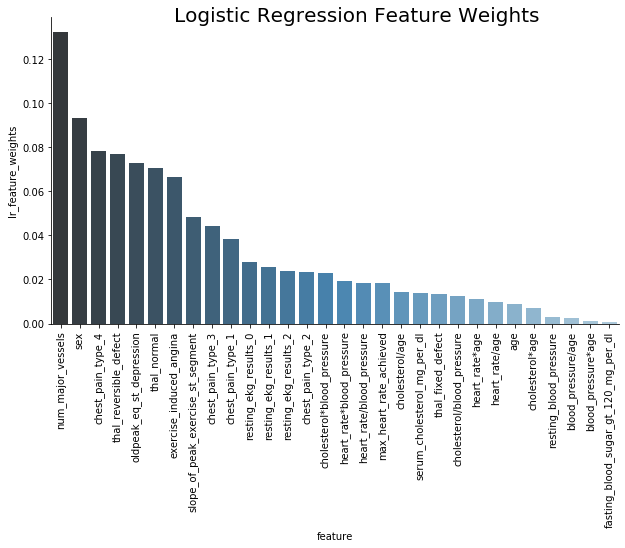

In [36]:
sns.catplot(x='feature', y='lr_feature_weights', kind='bar', data= lr_features, height=5, aspect=2, palette="Blues_d")
plt.suptitle('Logistic Regression Feature Weights', fontsize=20, y = 1.0)
plt.xticks(rotation=90)
plt.show()

In [37]:
svc = SVC(probability=True, max_iter=100000, random_state=23)


C= [0.00001, 0.0001, 0.001, 0.01] + np.arange(0.1, 1.05, 0.05).tolist() + np.arange(1, 11 , 1).tolist()

kernel= ['linear', 'poly', 'rbf', 'sigmoid']

degree= np.arange(0.1, 1.00, 0.05).tolist() + np.arange(1, 10 , 1).tolist() + np.arange(10, 110 , 10).tolist()

gamma= ['auto_deprecated', 'auto', 'scale']

decision_function_shape = ['ovr', 'ovo']

coef0= [0.00001, 0.0001, 0.001, 0.01] + np.arange(0.1, 1.05, 0.05).tolist() + np.arange(1, 11 , 1).tolist()

shrinking = [True, False]

svc_param_grid= dict(kernel=kernel, degree=degree, C=C, coef0=coef0, gamma=gamma,
                      shrinking = shrinking, decision_function_shape=decision_function_shape) 

svc_grid= RandomizedSearchCV(svc, svc_param_grid, cv=5, scoring='neg_log_loss',
                              n_iter=2000, n_jobs=-1, random_state=23, error_score=0, iid=False)

svc_grid.fit(x_train, y_train)


print("Best estimator that was chosen by the search:")
print(svc_grid.best_estimator_)
print(f'Mean cross-validated score of the best estimator is: {abs(svc_grid.best_score_).round(5)}')

Best estimator that was chosen by the search:
SVC(C=0.9000000000000002, cache_size=200, class_weight=None, coef0=2,
    decision_function_shape='ovr', degree=0.6000000000000002, gamma='scale',
    kernel='sigmoid', max_iter=100000, probability=True, random_state=23,
    shrinking=True, tol=0.001, verbose=False)
Mean cross-validated score of the best estimator is: 0.40736


In [38]:
svc2 = svc_grid.best_estimator_
svc2.fit(x_train, y_train)

svc2_prediction = svc2.predict_proba(x_test)

svc2_score = cross_val_score(svc2, x_train, y_train, cv=5, scoring='accuracy')

svc2_log_loss = abs(cross_val_score(svc2, x_train, y_train, cv=5, scoring='neg_log_loss'))


print(f'Mean cross-validated accuracy score= {(svc2_score.mean()*100).round(2)} +/- {(svc2_score.std()*100).round(2)}')
print(f'Mean cross-validated log loss= {(svc2_log_loss.mean()).round(5)} +/- {(svc2_log_loss.std()).round(5)}')

Mean cross-validated accuracy score= 83.89 +/- 9.53
Mean cross-validated log loss= 0.40736 +/- 0.13511


In [39]:
lsvc = SVC(probability=True, kernel='linear', max_iter=100000, random_state=23)


C= [0.00001, 0.0001, 0.001, 0.01] + np.arange(0.1, 1.05, 0.05).tolist() + np.arange(1, 11 , 1).tolist()


degree= np.arange(0.1, 1.00, 0.05).tolist() + np.arange(1, 10 , 1).tolist() + np.arange(10, 110 , 10).tolist()

gamma= ['auto_deprecated', 'auto', 'scale']

decision_function_shape = ['ovr', 'ovo']

coef0= [0.00001, 0.0001, 0.001, 0.01] + np.arange(0.1, 1.05, 0.05).tolist() + np.arange(1, 11 , 1).tolist()

shrinking = [True, False]

lsvc_param_grid= dict(C=C, degree=degree, coef0=coef0, gamma=gamma,
                      shrinking = shrinking, decision_function_shape=decision_function_shape) 

lsvc_grid= RandomizedSearchCV(lsvc, lsvc_param_grid, cv=5, scoring='neg_log_loss',
                              n_iter=20000, n_jobs=-1, random_state=23, error_score=0, iid=False)

lsvc_grid.fit(x_train, y_train)


print("Best estimator that was chosen by the search:")
print(lsvc_grid.best_estimator_)
print(f'Mean cross-validated score of the best estimator is: {abs(lsvc_grid.best_score_).round(5)}')

Best estimator that was chosen by the search:
SVC(C=0.15000000000000002, cache_size=200, class_weight=None,
    coef0=0.5000000000000001, decision_function_shape='ovo', degree=7,
    gamma='scale', kernel='linear', max_iter=100000, probability=True,
    random_state=23, shrinking=False, tol=0.001, verbose=False)
Mean cross-validated score of the best estimator is: 0.42393


In [40]:
lsvc2= lsvc_grid.best_estimator_

lsvc2.fit(x_train, y_train)

lsvc2_prediction = lsvc2.predict_proba(x_test)

lsvc2_score = cross_val_score(lsvc2, x_train, y_train, cv=5, scoring='accuracy')

lsvc2_log_loss = abs(cross_val_score(lsvc2, x_train, y_train, cv=5, scoring='neg_log_loss'))


print(f'Mean cross-validated accuracy score= {(lsvc2_score.mean()*100).round(2)} +/- {(lsvc2_score.std()*100).round(2)}')
print(f'Mean cross-validated log loss= {(lsvc2_log_loss.mean()).round(5)} +/- {(lsvc2_log_loss.std()).round(5)}')

Mean cross-validated accuracy score= 81.67 +/- 6.24
Mean cross-validated log loss= 0.42393 +/- 0.11124


In [41]:
lsvc_feature_weights = pd.DataFrame(lsvc2.coef_)
lsvc_feature_weights = lsvc_feature_weights.transpose()
lsvc_features= pd.DataFrame()
lsvc_features['feature']= x_train.columns
lsvc_features['lsvc_feature_weights']= abs(lsvc_feature_weights)
lsvc_features['lsvc_feature_weights'] = (lsvc_features["lsvc_feature_weights"] / lsvc_features["lsvc_feature_weights"].sum()).round(4)  #softmax normlization

lsvc_features= lsvc_features.sort_values(by=['lsvc_feature_weights'], ascending=False) #.style.hide_index()
lsvc_features.head()

,feature,lsvc_feature_weights
2,num_major_vessels,0.1415
5,oldpeak_eq_st_depression,0.0704
22,thal_reversible_defect,0.0702
9,exercise_induced_angina,0.0697
6,sex,0.0648


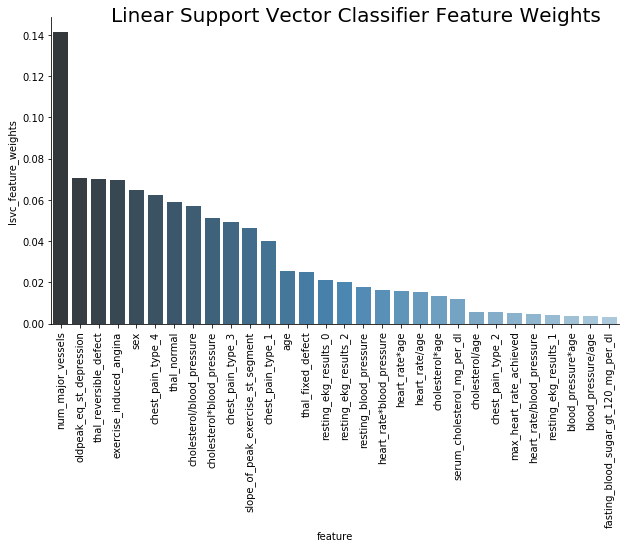

In [42]:
sns.catplot(x='feature', y='lsvc_feature_weights', kind='bar', data= lsvc_features, height=5, aspect=2, palette="Blues_d")
plt.suptitle('Linear Support Vector Classifier Feature Weights', fontsize=20, y = 1.0)
plt.xticks(rotation=90)
plt.show()

In [43]:
adaboost = AdaBoostClassifier(n_estimators=1000, random_state=23)

base_estimator= [DecisionTreeClassifier(max_depth=1), DecisionTreeClassifier(max_depth=2)]

learning_rate= np.arange(0.1, 1.1, 0.1).tolist() + [1.5 ,2]

algorithm = ['SAMME', 'SAMME.R']

adaboost_param_grid=dict(base_estimator=base_estimator, learning_rate=learning_rate, algorithm=algorithm) 
    
adaboost_grid= GridSearchCV(adaboost, adaboost_param_grid, cv=5, scoring='neg_log_loss', 
                            n_jobs=-1, error_score=0, iid=False)

adaboost_grid.fit(x_train, y_train)


print("Best estimator that was chosen by the search:")
print(adaboost_grid.best_estimator_)
print(f'Mean cross-validated score of the best estimator is: {abs(adaboost_grid.best_score_).round(5)}')

Best estimator that was chosen by the search:
AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=2,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         ra

In [44]:
adaboost2 = adaboost_grid.best_estimator_
adaboost2.fit(x_train, y_train)

adaboost2_prediction = adaboost2.predict_proba(x_test)

adaboost2_score = cross_val_score(adaboost2, x_train, y_train, cv=5, scoring='accuracy')

adaboost2_log_loss = abs(cross_val_score(adaboost2, x_train, y_train, cv=5, scoring='neg_log_loss'))


print(f'Mean cross-validated accuracy score= {(adaboost2_score.mean()*100).round(2)} +/- {(adaboost2_score.std()*100).round(2)}')
print(f'Mean cross-validated log loss= {(adaboost2_log_loss.mean()).round(5)} +/- {(adaboost2_log_loss.std()).round(5)}')

Mean cross-validated accuracy score= 76.67 +/- 5.15
Mean cross-validated log loss= 0.55743 +/- 0.00909


In [45]:
gradientboost.get_params().keys()

dict_keys(['criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'presort', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [46]:
gradientboost = GradientBoostingClassifier(random_state=23, warm_start= True, n_estimators=1000)

loss= ['deviance', 'exponential'] #loss function to be optimized.

learning_rate= [0.01] + np.arange(0.1, 1.0, 0.1).tolist() 

criterion= ['friedman_mse','mse', 'mae'] #The function to measure the quality of a split.

min_samples_split= [2,4,8] #The minimum number of samples required to split an internal node

min_samples_leaf = [1,2,4,8] #The minimum number of samples required to be at a leaf node

max_features = [None,'auto', 'sqrt', 'log2'] #The number of features to consider when looking for the best split

gradientboost_param_grid= dict(loss=loss, learning_rate=learning_rate, criterion=criterion,
                     min_samples_leaf=min_samples_leaf, min_samples_split=min_samples_split, max_features=max_features)

gradientboost_grid= RandomizedSearchCV(gradientboost, gradientboost_param_grid, cv=5, scoring='neg_log_loss',
                              n_iter=500, n_jobs=-1, random_state=23, error_score=0, iid=False)

gradientboost_grid.fit(x_train, y_train)


print("Best estimator that was chosen by the search:")
print(gradientboost_grid.best_estimator_)
print(f'Mean cross-validated score of the best estimator is: {abs(gradientboost_grid.best_score_).round(5)}')

Best estimator that was chosen by the search:
GradientBoostingClassifier(criterion='mae', init=None, learning_rate=0.01,
                           loss='deviance', max_depth=3, max_features='log2',
                           max_leaf_nodes=None, min_impurity_decrease=0.0,
                           min_impurity_split=None, min_samples_leaf=8,
                           min_samples_split=8, min_weight_fraction_leaf=0.0,
                           n_estimators=1000, n_iter_no_change=None,
                           presort='auto', random_state=23, subsample=1.0,
                           tol=0.0001, validation_fraction=0.1, verbose=0,
                           warm_start=True)
Mean cross-validated score of the best estimator is: 0.45917


In [47]:
gradientboost2 = gradientboost_grid.best_estimator_

gradientboost2.fit(x_train, y_train)

gradientboost2_prediction = gradientboost2.predict_proba(x_test)

gradientboost2_score = cross_val_score(gradientboost2, x_train, y_train, cv=5, scoring='accuracy')

gradientboost2_log_loss = abs(cross_val_score(gradientboost2, x_train, y_train, cv=5, scoring='neg_log_loss'))


print(f'Mean cross-validated accuracy score= {(gradientboost2_score.mean()*100).round(2)} +/- {(gradientboost2_score.std()*100).round(2)}')
print(f'Mean cross-validated log loss= {(gradientboost2_log_loss.mean()).round(5)} +/- {(gradientboost2_log_loss.std()).round(5)}')

Mean cross-validated accuracy score= 80.56 +/- 6.8
Mean cross-validated log loss= 0.45917 +/- 0.16335


In [48]:
gpc.get_params().keys()

dict_keys(['copy_X_train', 'kernel', 'max_iter_predict', 'multi_class', 'n_jobs', 'n_restarts_optimizer', 'optimizer', 'random_state', 'warm_start'])

In [49]:
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process.kernels import Matern
from sklearn.gaussian_process.kernels import RationalQuadratic
from sklearn.gaussian_process.kernels import DotProduct

gpc = GaussianProcessClassifier(max_iter_predict= 1000, random_state=23, multi_class='one_vs_rest',  n_jobs=-1, warm_start=True)

kernel= [RBF(), Matern(), RationalQuadratic(), DotProduct()]

optimizer = 1

gpc_param_grid= dict(kernel=kernel) 

gpc_grid= GridSearchCV(gpc, gpc_param_grid, cv=5, scoring='neg_log_loss',
                       n_jobs=-1, error_score=0, iid=False)

gpc_grid.fit(x_train, y_train)


print("Best estimator that was chosen by the search:")
print(gpc_grid.best_estimator_)
print(f'Mean cross-validated score of the best estimator is: {abs(gpc_grid.best_score_).round(5)}')

Best estimator that was chosen by the search:
GaussianProcessClassifier(copy_X_train=True, kernel=DotProduct(sigma_0=1),
                          max_iter_predict=1000, multi_class='one_vs_rest',
                          n_jobs=-1, n_restarts_optimizer=0,
                          optimizer='fmin_l_bfgs_b', random_state=23,
                          warm_start=True)
Mean cross-validated score of the best estimator is: 0.42143


In [50]:
gpc2 = gpc_grid.best_estimator_
gpc2.fit(x_train, y_train)

gpc2_prediction = gpc2.predict_proba(x_test)

gpc2_score = cross_val_score(gpc2, x_train, y_train, cv=5, scoring='accuracy')

gpc2_log_loss = abs(cross_val_score(gpc2, x_train, y_train, cv=5, scoring='neg_log_loss'))


print(f'Mean cross-validated accuracy score= {(gpc2_score.mean()*100).round(2)} +/- {(gpc2_score.std()*100).round(2)}')
print(f'Mean cross-validated log loss= {(gpc2_log_loss.mean()).round(5)} +/- {(gpc2_log_loss.std()).round(5)}')

Mean cross-validated accuracy score= 81.11 +/- 7.33
Mean cross-validated log loss= 0.42143 +/- 0.13251


In [51]:
gnb = GaussianNB()

var_smoothing=[ 0, 0.00000001, 0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01] + np.arange(0.1, 1.05, 0.05).tolist() + np.arange(1, 11 , 1).tolist()

gnb_param_grid= dict(var_smoothing=var_smoothing) 

gnb_grid= GridSearchCV(gnb, gnb_param_grid, cv=5, scoring='neg_log_loss',
                       n_jobs=-1, error_score=0, iid=False)

gnb_grid.fit(x_train, y_train)


print("Best estimator that was chosen by the search:")
print(gnb_grid.best_estimator_)
print(f'Mean cross-validated score of the best estimator is: {abs(gnb_grid.best_score_).round(5)}')

Best estimator that was chosen by the search:
GaussianNB(priors=None, var_smoothing=3)
Mean cross-validated score of the best estimator is: 0.4493


In [52]:
gnb2 = gnb_grid.best_estimator_
gnb2.fit(x_train, y_train)

gnb2_prediction = gnb2.predict_proba(x_test)

gnb2_score = cross_val_score(gnb2, x_train, y_train, cv=5, scoring='accuracy')

gnb2_log_loss = abs(cross_val_score(gnb2, x_train, y_train, cv=5, scoring='neg_log_loss'))


print(f'Mean cross-validated accuracy score= {(gnb2_score.mean()*100).round(2)} +/- {(gnb2_score.std()*100).round(2)}')
print(f'Mean cross-validated log loss= {(gnb2_log_loss.mean()).round(5)} +/- {(gnb2_log_loss.std()).round(5)}')

Mean cross-validated accuracy score= 80.0 +/- 5.93
Mean cross-validated log loss= 0.4493 +/- 0.07924


In [53]:
knn = KNeighborsClassifier(n_jobs=-1)

n_neighbors= np.arange(1, 26 , 1).tolist() #Number of neighbors to use by default for kneighbors queries.

weights = ['uniform', 'distance'] #Weight function used in prediction.

algorithm= ['auto', 'ball_tree', 'kd_tree', 'brute'] #Algorithm used to compute the nearest neighbors
    
leaf_size= np.arange(10, 50 , 1).tolist() #Leaf size passed to BallTree or KDTree.

p= [1,2] #Power parameter for the Minkowski metric

metric = ['euclidean', 'manhattan', 'chebyshev', 'minkowski', 'wminkowski', 'seuclidean', 'mahalanobis'] 

#the distance metric to use for the tree. The default metric is minkowski, and with p=2 is equivalent to the standard Euclidean metric.

knn_param_grid= dict(n_neighbors=n_neighbors, weights=weights, 
                     algorithm=algorithm, leaf_size=leaf_size, p=p)

knn_grid= RandomizedSearchCV(knn, knn_param_grid, cv=5, scoring='neg_log_loss',
                             n_jobs=-1, n_iter=1000, random_state=23, error_score=0, iid=False)

knn_grid.fit(x_train, y_train)

print("Best estimator that was chosen by the search:")
print(knn_grid.best_estimator_)
print(f'Mean cross-validated score of the best estimator is: {abs(knn_grid.best_score_).round(5)}')

Best estimator that was chosen by the search:
KNeighborsClassifier(algorithm='brute', leaf_size=35, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=19, p=1,
                     weights='uniform')
Mean cross-validated score of the best estimator is: 0.42814


In [54]:
knn2 = knn_grid.best_estimator_
knn2.fit(x_train, y_train)

knn2_prediction = knn2.predict_proba(x_test)

knn2_score = cross_val_score(knn2, x_train, y_train, cv=5, scoring='accuracy')

knn2_log_loss = abs(cross_val_score(knn2, x_train, y_train, cv=5, scoring='neg_log_loss'))


print(f'Mean cross-validated accuracy score= {(knn2_score.mean()*100).round(2)} +/- {(knn2_score.std()*100).round(2)}')
print(f'Mean cross-validated log loss= {(knn2_log_loss.mean()).round(5)} +/- {(knn2_log_loss.std()).round(5)}')

Mean cross-validated accuracy score= 80.56 +/- 8.78
Mean cross-validated log loss= 0.42814 +/- 0.09451


In [55]:
rfc = RandomForestClassifier(random_state=23, n_jobs=-1, warm_start=True)


criterion = ['gini', 'entropy'] #The function to measure the quality of a split

n_estimators = [1000] #The number of trees in the forest

min_samples_split = [2,4,8] #The minimum number of samples required to split an internal node

min_samples_leaf = [1,2,4,8] #The minimum number of samples required to be at a leaf node

max_features = ['auto', 'sqrt', 'log2'] #The number of features to consider when looking for the best split

rfc_param_grid= dict(criterion=criterion, n_estimators=n_estimators,
                     min_samples_leaf=min_samples_leaf, min_samples_split=min_samples_split, max_features=max_features)

rfc_grid= GridSearchCV(rfc, rfc_param_grid, cv=5, scoring='neg_log_loss',
                             n_jobs=-1, error_score=0, iid=False)

rfc_grid.fit(x_train, y_train)

print("Best estimator that was chosen by the search:")
print(rfc_grid.best_estimator_)
print(f'Mean cross-validated score of the best estimator is: {abs(rfc_grid.best_score_).round(5)}')

Best estimator that was chosen by the search:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=-1, oob_score=False, random_state=23, verbose=0,
                       warm_start=True)
Mean cross-validated score of the best estimator is: 0.45704


In [56]:
rfc2 = rfc_grid.best_estimator_
rfc2.fit(x_train, y_train)

rfc2_prediction = rfc2.predict_proba(x_test)

rfc2_score = cross_val_score(rfc2, x_train, y_train, cv=5, scoring='accuracy')

rfc2_log_loss = abs(cross_val_score(rfc2, x_train, y_train, cv=5, scoring='neg_log_loss'))


print(f'Mean cross-validated accuracy score= {(rfc2_score.mean()*100).round(2)} +/- {(rfc2_score.std()*100).round(2)}')
print(f'Mean cross-validated log loss= {(rfc2_log_loss.mean()).round(5)} +/- {(rfc2_log_loss.std()).round(5)}')

C:\Users\aly.hafez\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:307: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "


Mean cross-validated accuracy score= 78.33 +/- 8.13
Mean cross-validated log loss= 0.45704 +/- 0.08115


In [57]:
rfc_features= pd.DataFrame()
rfc_features['feature']= x_train.columns
rfc_features['rfc_feature_importances_']= rfc2.feature_importances_*100
rfc_features['rfc_feature_importances_'] = (rfc_features['rfc_feature_importances_'] / rfc_features['rfc_feature_importances_'].sum()).round(4)  #softmax normlization

rfc_features= rfc_features.sort_values(by=['rfc_feature_importances_'], ascending=False) #.style.hide_index()
rfc_features.head()

,feature,rfc_feature_importances_
22,thal_reversible_defect,0.0789
21,thal_normal,0.0739
26,chest_pain_type_4,0.0643
5,oldpeak_eq_st_depression,0.0623
2,num_major_vessels,0.0547


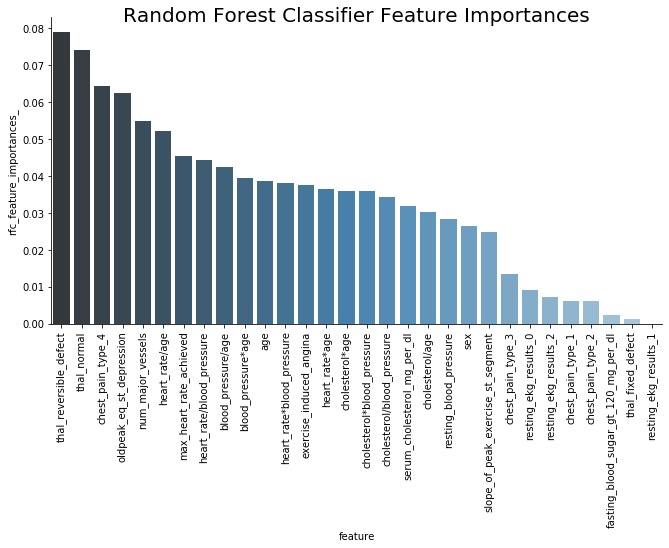

In [58]:
sns.catplot(x='feature', y='rfc_feature_importances_', kind='bar', data= rfc_features, height=5, aspect=2, palette="Blues_d")
plt.suptitle('Random Forest Classifier Feature Importances', fontsize=20, y = 1.0)
plt.xticks(rotation=90)
plt.show()

In [59]:
mlp.get_params().keys()

dict_keys(['activation', 'alpha', 'batch_size', 'beta_1', 'beta_2', 'early_stopping', 'epsilon', 'hidden_layer_sizes', 'learning_rate', 'learning_rate_init', 'max_iter', 'momentum', 'n_iter_no_change', 'nesterovs_momentum', 'power_t', 'random_state', 'shuffle', 'solver', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [60]:
mlp = MLPClassifier(max_iter=1000, random_state=23, warm_start=True)

hidden_layer_sizes= [x for x in itertools.product((100,50,20), repeat=2)] + [50, 100] + np.arange(1, 32, 1).tolist()

activation= ['identity', 'logistic', 'tanh', 'relu']
    
solver= ['lbfgs', 'sgd', 'adam']

alpha= [0.00001, 0.0001, 0.001, 0.01, 0.1, 1 , 10]

learning_rate= ['constant', 'invscaling', 'adaptive']

learning_rate_init= [0.001, 0.01] + np.arange(0.1, 1.0, 0.1).tolist()


mlp_param_grid= dict(hidden_layer_sizes=hidden_layer_sizes, activation=activation, solver=solver, alpha=[1], learning_rate=learning_rate)

mlp_grid= RandomizedSearchCV(mlp, mlp_param_grid, cv=5, scoring='neg_log_loss',
                             n_jobs=-1, n_iter=1000, random_state=23, error_score=0, iid=False)

mlp_grid.fit(x_train, y_train)


print("Best estimator that was chosen by the search:")
print(mlp_grid.best_estimator_)
print(f'Mean cross-validated score of the best estimator is: {abs(mlp_grid.best_score_).round(5)}')

Best estimator that was chosen by the search:
MLPClassifier(activation='relu', alpha=1, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=1, learning_rate='invscaling',
              learning_rate_init=0.001, max_iter=1000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=23, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=True)
Mean cross-validated score of the best estimator is: 0.40599


In [61]:
mlp2 = mlp_grid.best_estimator_
mlp2.fit(x_train, y_train)

mlp2_prediction = mlp2.predict_proba(x_test)

mlp2_score = cross_val_score(mlp2, x_train, y_train, cv=5, scoring='accuracy')

mlp2_log_loss = abs(cross_val_score(mlp2, x_train, y_train, cv=5, scoring='neg_log_loss'))


print(f'Mean cross-validated accuracy score= {(mlp2_score.mean()*100).round(2)} +/- {(mlp2_score.std()*100).round(2)}')
print(f'Mean cross-validated log loss= {(mlp2_log_loss.mean()).round(5)} +/- {(mlp2_log_loss.std()).round(5)}')

Mean cross-validated accuracy score= 85.0 +/- 6.48
Mean cross-validated log loss= 0.40599 +/- 0.09542


In [62]:
sgd = SGDClassifier(random_state=23, warm_start=True, n_jobs=-1)

loss= [ 'log', 'modified_huber'] #'perceptron', 'squared_loss','huber','squared_hinge','hinge','epsilon_insensitive', do not work with predict_proba

tol= [0.00001, 0.0001, 0.001, 0.01] + np.arange(0.1, 1.05, 0.05).tolist()

penalty= ['l2', 'l1', 'elasticnet']

alpha= [0.00001, 0.0001, 0.001, 0.01] + np.arange(0.1, 1.05, 0.05).tolist() + [1.5, 2]

sgd_param_grid= dict(loss=loss, penalty=penalty, alpha=alpha, tol=tol)

sgd_grid= RandomizedSearchCV(sgd, sgd_param_grid, cv=5, scoring='neg_log_loss',
                             n_jobs=-1, n_iter=1000, random_state=23, error_score=0, iid=False)

sgd_grid.fit(x_train, y_train)


print("Best estimator that was chosen by the search:")
print(sgd_grid.best_estimator_)
print(f'Mean cross-validated score of the best estimator is: {abs(sgd_grid.best_score_).round(5)}')

Best estimator that was chosen by the search:
SGDClassifier(alpha=0.1, average=False, class_weight=None, early_stopping=False,
              epsilon=0.1, eta0=0.0, fit_intercept=True, l1_ratio=0.15,
              learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=-1, penalty='l2', power_t=0.5,
              random_state=23, shuffle=True, tol=0.01, validation_fraction=0.1,
              verbose=0, warm_start=True)
Mean cross-validated score of the best estimator is: 0.41869


In [63]:
sgd2 = sgd_grid.best_estimator_
sgd2.fit(x_train, y_train)

sgd2_prediction = sgd2.predict_proba(x_test)

sgd2_score = cross_val_score(sgd2, x_train, y_train, cv=5, scoring='accuracy')

sgd2_log_loss = abs(cross_val_score(sgd2, x_train, y_train, cv=5, scoring='neg_log_loss'))


print(f'Mean cross-validated accuracy score= {(sgd2_score.mean()*100).round(2)} +/- {(sgd2_score.std()*100).round(2)}')
print(f'Mean cross-validated log loss= {(sgd2_log_loss.mean()).round(5)} +/- {(sgd2_log_loss.std()).round(5)}')

Mean cross-validated accuracy score= 82.22 +/- 5.98
Mean cross-validated log loss= 0.41869 +/- 0.10953


In [64]:
sgd_feature_weights = pd.DataFrame(sgd2.coef_)
sgd_feature_weights = sgd_feature_weights.transpose()
sgd_features= pd.DataFrame()
sgd_features['feature']= x_train.columns
sgd_features['sgd_feature_weights']= abs(sgd_feature_weights)
sgd_features["sgd_feature_weights"] = (sgd_features["sgd_feature_weights"] / sgd_features["sgd_feature_weights"].sum()).round(4)  #softmax normlization

sgd_features= sgd_features.sort_values(by=['sgd_feature_weights'], ascending=False) #.style.hide_index()
sgd_features.head()

,feature,sgd_feature_weights
2,num_major_vessels,0.1261
6,sex,0.0884
22,thal_reversible_defect,0.0823
26,chest_pain_type_4,0.0806
21,thal_normal,0.0762


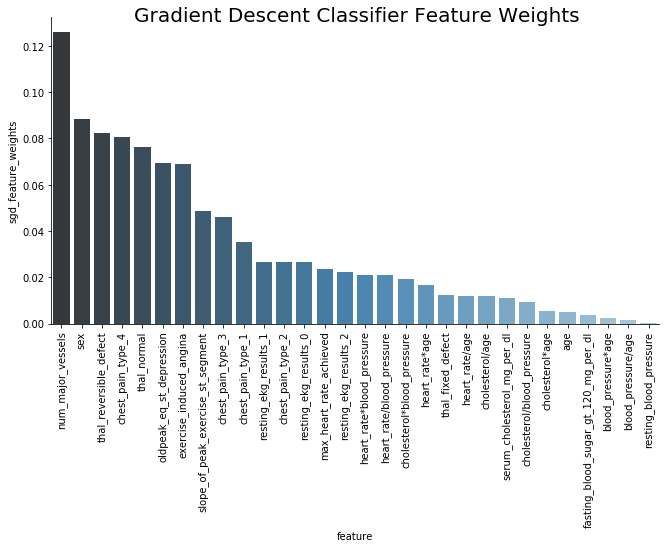

In [65]:
sns.catplot(x='feature', y='sgd_feature_weights', kind='bar', data=sgd_features, height=5, aspect=2, palette="Blues_d")
plt.suptitle('Gradient Descent Classifier Feature Weights', fontsize=20, y = 1.0)
plt.xticks(rotation=90)
plt.show()

In [66]:
optmized_models = pd.DataFrame({
                         'Optmized_Model': ['LogisticRegression', 'RandomForestClassifier','SGDClassifier',
                                            'KNeighborsClassifier' , 'GaussianNB',  
                                            'LinearSVC', 'SVC', 'GaussianProcessClassifier',
                                            'AdaBoostClassifier', 'GradientBoostingClassifier', 'MLPClassifier'],
                               
                            'CV_Accuracy': [lr2_score.mean(), rfc2_score.mean(), sgd2_score.mean(), 
                                            knn2_score.mean(), gnb2_score.mean(),
                                            lsvc2_score.mean(), svc2_score.mean(), gpc2_score.mean(),
                                            adaboost2_score.mean(), gradientboost2_score.mean(), mlp2_score.mean()],
                               
                            'CV_Log_Loss': [lr2_log_loss.mean(), rfc2_log_loss.mean(), sgd2_log_loss.mean(),
                                           knn2_log_loss.mean(), gnb2_log_loss.mean(),
                                           lsvc2_log_loss.mean(), svc2_log_loss.mean(), gpc2_log_loss.mean(),
                                           adaboost2_log_loss.mean(), gradientboost2_log_loss.mean(), mlp2_log_loss.mean()]
                              })


optmized_models['CV_Accuracy'] = (optmized_models['CV_Accuracy']*100).round(2)
optmized_models['CV_Log_Loss'] = (optmized_models['CV_Log_Loss']).round(5)

optmized_models['Weight'] = ((optmized_models['CV_Log_Loss'])**(-6))

optmized_models['Weight'] = ((optmized_models['Weight'])/ (optmized_models['Weight'].max())).round(3)


optmized_models.sort_values(by=['CV_Log_Loss'], ascending=True).style.hide_index()

Optmized_Model,CV_Accuracy,CV_Log_Loss,Weight
MLPClassifier,85,0.40599,1
SVC,83.89,0.40736,0.98
LogisticRegression,81.67,0.41711,0.85
SGDClassifier,82.22,0.41869,0.831
GaussianProcessClassifier,81.11,0.42143,0.799
LinearSVC,81.67,0.42393,0.771
KNeighborsClassifier,80.56,0.42814,0.727
GaussianNB,80,0.4493,0.544
RandomForestClassifier,78.33,0.45704,0.491
GradientBoostingClassifier,80.56,0.45917,0.478


In [67]:
(optmized_models['Optmized_Model'].tolist(), optmized_models['Weight'].tolist())

(['LogisticRegression',
  'RandomForestClassifier',
  'SGDClassifier',
  'KNeighborsClassifier',
  'GaussianNB',
  'LinearSVC',
  'SVC',
  'GaussianProcessClassifier',
  'AdaBoostClassifier',
  'GradientBoostingClassifier',
  'MLPClassifier'],
 [0.85, 0.491, 0.831, 0.727, 0.544, 0.771, 0.98, 0.799, 0.149, 0.478, 1.0])

In [68]:
vc= VotingClassifier(estimators=[ ('LogisticRegression', lr2), ('RandomForestClassifier', rfc2), ('SGDClassifier',sgd2),
                                  ('KNeighborsClassifier', knn2), ('GaussianNB', gnb2), ('LinearSVC', lsvc2),
                                  ('SVC', svc2), ('GaussianProcessClassifier', gpc), ('AdaBoostClassifier', adaboost2),
                                  ('GradientBoostingClassifier', gradientboost2), ('MLPClassifier', mlp2)],
                     voting='soft',
                     weights = optmized_models['Weight'].tolist(),
                     n_jobs=-1)

vc.fit(x_train, y_train)

vc_prediction = vc.predict_proba(x_test)

vc_score = cross_val_score(vc, x_train, y_train, cv=5)

vc_log_loss = abs(cross_val_score(vc, x_train, y_train, cv=5, scoring='neg_log_loss'))


print(f'Mean cross-validated accuracy score= {(vc_score.mean()*100).round(2)} +/- {(vc_score.std()*100).round(2)}')
print(f'Mean cross-validated log loss= {(vc_log_loss.mean()).round(5)} +/- {(vc_log_loss.std()).round(5)}')

Mean cross-validated accuracy score= 81.67 +/- 6.48
Mean cross-validated log loss= 0.4265 +/- 0.08412


In [69]:
vc_prediction = pd.DataFrame(vc_prediction.round(6))
vc_prediction.head()

,0,1
0,0.563811,0.436189
1,0.821401,0.178599
2,0.119720,0.880280
3,0.839729,0.160271
4,0.175891,0.824109


In [70]:
cleveland_heart_disease_vc_prediction = test_values.patient_id.to_frame('patient_id')
cleveland_heart_disease_vc_prediction['heart_disease_present'] = vc_prediction[1].round(6)
print(cleveland_heart_disease_vc_prediction.info())
cleveland_heart_disease_vc_prediction.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 2 columns):
patient_id               90 non-null object
heart_disease_present    90 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.5+ KB
None


,patient_id,heart_disease_present
0,olalu7,0.436189
1,z9n6mx,0.178599
2,5k4413,0.880280
3,mrg7q5,0.160271
4,uki4do,0.824109


In [71]:
#cleveland_heart_disease_vc_prediction.to_csv('cleveland_heart_disease_vc_train_prediction.csv', index = False) 

In [72]:
#Best overall DrivenData submission: log loss= 0.34338, Rank= 364/3905 